
Assumptions:
- isentropic compression and expansion
- Instantaneous combustion yielding equilibrium composition
- No reaction during the rest of the cycle

Numbering:
- BDC, prior compression: State 1
- TDC, after compression, before combustion: State 2
- TDC, after combustion: State 3
- BDC, after power stroke: State 4



In [23]:
# Import Cantera and Numpy
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

# Check to make sure Cantera was loaded in correctly
print("Gas Constant R: {:.2f} [J kmol^-1 K^-1]".format(ct.gas_constant))


Gas Constant R: 8314.46 [J kmol^-1 K^-1]


# Input parameters and geometry
Some useful equations:
$$ V_{BDC} = V_{TDC} + V_{stroke}$$
$$ \textrm{Compression Ratio} = r = \frac{V_{BDC}}{V_{TDC}}$$
$$ V_{stroke} = A_{cyl} L_{stroke} $$

In [7]:

# Geometry parameter (bore, stroke, compression ratio
Bore = 0
Stroke = 0
r = 0

# Top Dead Center volume
VTDC = 0
# Bottom Dead Center volume
VBDC = 0

# Standard air
XO2_air = 0.21
XN2_air = 0.79

# Ideal gas constant (mole basis, J/mol.K)
Rmol = 8.314 

# Combustion chemistry model for gas composition
gas = ct.Solution('GRI30.yaml')

# Mass flow rate of propane [kg/s]
mflowrate = 0



 # State 1 - end of intake, prior to compression stroke
 Some helpful equations:

 $$ Y_i = X_i \frac{M_i}{M_{mix}}$$
 $$ M_{mix} = \sum_{i}^{N=Ns} M_i X_i$$

where $M_i$ is the molar mass of species $i$ and $M_{mix}$ is the molar mass of the mixture

Equivalence ratio:
$$ \phi = \frac{\bigg (X_{C3H8} / X_{O2}\bigg )} {\bigg (X_{C3H8} / X_{O2} \bigg)_{st}}$$


In [18]:
# Temperature [K] (estimated)
T1 = 500

# Equivalence ratio [no unit]
phi = 0

# Gas composition [mole fraction, no unit]
XO2 = 0
XC3H8 = 0
XN2 = 0

# Store those values at the proper location
iC3H8 = gas.species_index("C3H8")
iO2 = gas.species_index("O2")
iN2 = gas.species_index("N2")

gas.X[iC3H8] = XC3H8
gas.X[iO2] = XO2
gas.X[iN2] = XN2

X1 = gas.X

# Mass of fuel in cylinder
mC3H8 = 0

# Pressure at the end of intake stroke (requires some intermediate steps)
# Molar mass of gas mixture inside cylinder
MM_C3H8 = 0
MM_O2 = 0
MM_N2 = 0
MM_mix = 1

# Mass fractions of propane, O2 and N2
YC3H8 = 0
YO2 = 0
YN2 = 0

# Total mass of gas in cylinder
m = 0

# Density in cylinder
rho = 0

# and finally, pressure at state 1
P1 = rho * T1 * Rmol / MM_mix

print("T1: {:.2f} [K]".format(T1))
print("P1: {:.2f} [Bar]".format(P1 * 1e-5))


T1: 500.00 [K]
P1: 0.00 [Bar]


# State 2 - end of compression stroke, prior combustion

The composition has not changed since we are not considering any
chemistry during the compression and power strokes.

The gas object allows you to set the gas mixture to a given state, and calculate
useful thermodynamic properties. For example:
 
gas.TPX = T1, P1, X1
cp = gas.cp_mass

gives you the specific heat capacity at constant pressure of the gas 
mixture with mole fractions specified in X, at a temperature T1 and a 
pressure P1. You can replace cp by cv to get the one at constant volume,
or replace mass by mole to get the corresponding molar quantities.

Remember that the compression stroke is an isentropic process! Some useful isentropic relations for an ideal gas:
$$ \frac{P2}{P1} = \bigg(  \frac{V1}{V2} \bigg)^\gamma$$

$$ \frac{T2}{T1} = \bigg(  \frac{V1}{V2} \bigg)^{(\gamma -1 )}$$

In [ ]:
gas.TP = T1, P1
X2 = X1

# Calculate P2 and T2 using isentropic relations
cp = gas.cp_mass
cv = gas.cv_mass
gamma = cp / cv

V1 = VBDC
V2 = VTDC

P2 = P1 * (V1 / V2) ^ (gamma)
T2 = T1 * (V1 / V2) ^ (gamma - 1)


# State 3 - end of combustion process, assuming equilibrium

In [ ]:

# Set the gas to the state just before combustion
gas.TPX = T2, P2, X2

# Obtain the equilibrium composition, temperature and pressure after
# combustion using Cantera fancy tool (technically corresponds to the
# minimization of Gibbs free energy for the mixture, if that is of interest)
gas.equilibrate('UV')

# Recover temperature, pressure and composition
T3 = gas.T
P3 = gas.P
X3 = gas.X


# State 4 - end of the power stroke

In [ ]:
# Apply isentropic relations to get the state of the system after the power
# stroke.
T4 = 0
P4 = 0
X4 = X3

# Cycle analysis

$$ \eta_{therm} = \frac{W_{net}} {Q_{in}} = \frac{Q_{2-3} + Q_{4-1}} {Q_{2-3}} = 1 + \frac{ Q_{4-1}} {Q_{2-3}}$$ 

$$Q_{2-3} = m c_v (T_3 - T_2)$$


In [20]:

eta = 0

print("Thermal Efficiency: {:.2f} %".format(eta*100))


Thermal Efficiency: 0.00 %


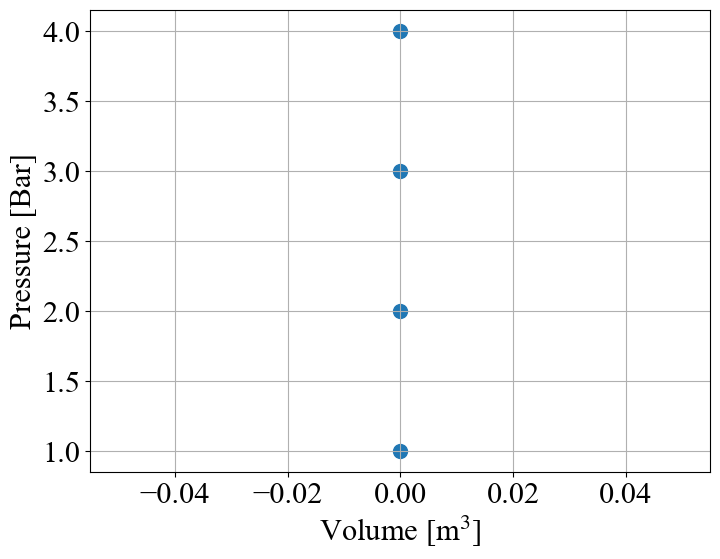

In [33]:
plt.rcParams.update({"font.size": 22})
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "Times New Roman"
lw = 2.5
ms = 8

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# ax.scatter([VBDC,VTDC, VTDC, VBDC], [P1,P2,P3,P4]*1e-5, s=100)
ax.scatter([VBDC,VTDC, VTDC, VBDC], [1,2,3,4], s=100)
ax.set(xlabel="Volume [m$^3$]", ylabel="Pressure [Bar]")
ax.grid()